In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
import pandas as pd
dataset_path = '/content/drive/Shared drives/DATA 228/Group Project/'

'''load feature data'''

feature_file_paths = [
    dataset_path+'dataset/46013h2014.txt', dataset_path+'dataset/46013h2015.txt', dataset_path+'dataset/46013h2016.txt', dataset_path+'dataset/46013h2017.txt', dataset_path+'dataset/46013h2018.txt', dataset_path+'dataset/46013h2019.txt', dataset_path+'dataset/46013h2021.txt', dataset_path+'dataset/46013h2022.txt',
    dataset_path+'dataset/46026h2014.txt', dataset_path+'dataset/46026h2015.txt', dataset_path+'dataset/46026h2016.txt', dataset_path+'dataset/46026h2017.txt', dataset_path+'dataset/46026h2018.txt', dataset_path+'dataset/46026h2019.txt', dataset_path+'dataset/46026h2020.txt', dataset_path+'dataset/46026h2021.txt', dataset_path+'dataset/46026h2022.txt',
    dataset_path+'dataset/46237h2014.txt', dataset_path+'dataset/46237h2015.txt', dataset_path+'dataset/46237h2016.txt', dataset_path+'dataset/46237h2017.txt', dataset_path+'dataset/46237h2018.txt', dataset_path+'dataset/46237h2019.txt', dataset_path+'dataset/46237h2020.txt', dataset_path+'dataset/46237h2021.txt', dataset_path+'dataset/46237h2022.txt',
    dataset_path+'dataset/ftpc1h2014.txt', dataset_path+'dataset/ftpc1h2015.txt', dataset_path+'dataset/ftpc1h2016.txt', dataset_path+'dataset/ftpc1h2017.txt', dataset_path+'dataset/ftpc1h2018.txt', dataset_path+'dataset/ftpc1h2019.txt', dataset_path+'dataset/ftpc1h2020.txt', dataset_path+'dataset/ftpc1h2021.txt', dataset_path+'dataset/ftpc1h2022.txt',
    dataset_path+'dataset/pxoc1h2014.txt', dataset_path+'dataset/pxoc1h2015.txt', dataset_path+'dataset/pxoc1h2016.txt', dataset_path+'dataset/pxoc1h2017.txt', dataset_path+'dataset/pxoc1h2018.txt', dataset_path+'dataset/pxoc1h2019.txt', dataset_path+'dataset/pxoc1h2020.txt', dataset_path+'dataset/pxoc1h2021.txt', dataset_path+'dataset/pxoc1h2022.txt',
    dataset_path+'dataset/pxsc1h2014.txt', dataset_path+'dataset/pxsc1h2015.txt', dataset_path+'dataset/pxsc1h2016.txt', dataset_path+'dataset/pxsc1h2017.txt', dataset_path+'dataset/pxsc1h2018.txt', dataset_path+'dataset/pxsc1h2019.txt', dataset_path+'dataset/pxsc1h2020.txt', dataset_path+'dataset/pxsc1h2021.txt', dataset_path+'dataset/pxsc1h2022.txt',
    dataset_path+'dataset/tibc1h2015.txt', dataset_path+'dataset/tibc1h2016.txt', dataset_path+'dataset/tibc1h2017.txt', dataset_path+'dataset/tibc1h2018.txt', dataset_path+'dataset/tibc1h2019.txt', dataset_path+'dataset/tibc1h2020.txt', dataset_path+'dataset/tibc1h2021.txt', dataset_path+'dataset/tibc1h2022.txt'
]


# Initialize an empty DataFrame to store the combined feature data
all_feature_data = pd.DataFrame()

# # Load and concatenate all feature files
# for feature_file_path in feature_file_paths:
#     feature_data = pd.read_csv(feature_file_path, delim_whitespace=True, skiprows=[1])
#     feature_data['timestamp'] = pd.to_datetime(feature_data[['#YY', 'MM', 'DD', 'hh']].astype(str).agg(' '.join, axis=1), format='%Y %m %d %H')
#     feature_data['year'] = feature_data['timestamp'].dt.year
#     feature_data['month'] = feature_data['timestamp'].dt.month
#     feature_data['day'] = feature_data['timestamp'].dt.day
#     feature_data['hour'] = feature_data['timestamp'].dt.hour
#     all_feature_data = pd.concat([all_feature_data, feature_data], axis=0, ignore_index=True)

for feature_file_path in feature_file_paths:
    feature_data = pd.read_csv(feature_file_path, delim_whitespace=True, skiprows=[1])
    feature_data['timestamp'] = pd.to_datetime(feature_data[['#YY', 'MM', 'DD', 'hh', 'mm']].astype(str).agg(' '.join, axis=1), format='%Y %m %d %H %M')
    feature_data['year'] = feature_data['timestamp'].dt.year
    feature_data['month'] = feature_data['timestamp'].dt.month
    feature_data['day'] = feature_data['timestamp'].dt.day
    feature_data['hour'] = feature_data['timestamp'].dt.hour
    feature_data['minute'] = feature_data['timestamp'].dt.minute
    all_feature_data = pd.concat([all_feature_data, feature_data], axis=0, ignore_index=True)


print(f'total count of feature data: {all_feature_data.shape[0]}')

total count of feature data: 3111213


In [ ]:
all_feature_data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,WTMP,DEWP,VIS,TIDE,timestamp,year,month,day,hour,minute
0,2013,12,31,23,50,314,4.9,99.0,99.00,99.00,...,999.0,999.0,99.0,99.0,2013-12-31 23:50:00,2013,12,31,23,50
1,2014,1,1,0,50,313,5.7,6.8,1.84,13.79,...,10.5,999.0,99.0,99.0,2014-01-01 00:50:00,2014,1,1,0,50
2,2014,1,1,1,50,315,5.0,6.1,1.59,12.90,...,10.4,999.0,99.0,99.0,2014-01-01 01:50:00,2014,1,1,1,50
3,2014,1,1,2,50,319,5.6,6.6,1.41,12.12,...,10.4,999.0,99.0,99.0,2014-01-01 02:50:00,2014,1,1,2,50
4,2014,1,1,3,50,318,4.6,5.7,1.74,14.81,...,10.3,999.0,99.0,99.0,2014-01-01 03:50:00,2014,1,1,3,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111208,2022,12,4,4,22,275,0.0,99.0,99.00,99.00,...,999.0,7.3,99.0,99.0,2022-12-04 04:22:00,2022,12,4,4,22
3111209,2022,12,4,4,28,296,0.0,99.0,99.00,99.00,...,999.0,7.3,99.0,99.0,2022-12-04 04:28:00,2022,12,4,4,28
3111210,2022,12,4,4,34,271,0.0,99.0,99.00,99.00,...,999.0,7.3,99.0,99.0,2022-12-04 04:34:00,2022,12,4,4,34
3111211,2022,12,4,4,40,280,0.0,99.0,99.00,99.00,...,999.0,7.4,99.0,99.0,2022-12-04 04:40:00,2022,12,4,4,40


In [ ]:
# Drop the 'TIDE' column
all_feature_data = all_feature_data.drop('TIDE', axis=1)


In [ ]:
all_feature_data

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,ATMP,WTMP,DEWP,VIS,timestamp,year,month,day,hour,minute
0,2013,12,31,23,50,314,4.9,99.0,99.00,99.00,...,10.3,999.0,999.0,99.0,2013-12-31 23:50:00,2013,12,31,23,50
1,2014,1,1,0,50,313,5.7,6.8,1.84,13.79,...,10.2,10.5,999.0,99.0,2014-01-01 00:50:00,2014,1,1,0,50
2,2014,1,1,1,50,315,5.0,6.1,1.59,12.90,...,10.2,10.4,999.0,99.0,2014-01-01 01:50:00,2014,1,1,1,50
3,2014,1,1,2,50,319,5.6,6.6,1.41,12.12,...,10.3,10.4,999.0,99.0,2014-01-01 02:50:00,2014,1,1,2,50
4,2014,1,1,3,50,318,4.6,5.7,1.74,14.81,...,10.4,10.3,999.0,99.0,2014-01-01 03:50:00,2014,1,1,3,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111208,2022,12,4,4,22,275,0.0,99.0,99.00,99.00,...,8.1,999.0,7.3,99.0,2022-12-04 04:22:00,2022,12,4,4,22
3111209,2022,12,4,4,28,296,0.0,99.0,99.00,99.00,...,8.1,999.0,7.3,99.0,2022-12-04 04:28:00,2022,12,4,4,28
3111210,2022,12,4,4,34,271,0.0,99.0,99.00,99.00,...,8.1,999.0,7.3,99.0,2022-12-04 04:34:00,2022,12,4,4,34
3111211,2022,12,4,4,40,280,0.0,99.0,99.00,99.00,...,8.2,999.0,7.4,99.0,2022-12-04 04:40:00,2022,12,4,4,40


In [ ]:
Performing Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111213 entries, 0 to 3111212
Data columns (total 23 columns):
 #   Column     Dtype         
---  ------     -----         
 0   #YY        int64         
 1   MM         int64         
 2   DD         int64         
 3   hh         int64         
 4   mm         int64         
 5   WDIR       int64         
 6   WSPD       float64       
 7   GST        float64       
 8   WVHT       float64       
 9   DPD        float64       
 10  APD        float64       
 11  MWD        int64         
 12  PRES       float64       
 13  ATMP       float64       
 14  WTMP       float64       
 15  DEWP       float64       
 16  VIS        float64       
 17  timestamp  datetime64[ns]
 18  year       int64         
 19  month      int64         
 20  day        int64         
 21  hour       int64         
 22  minute     int64         
dtypes: datetime64[ns](1), float64(10), int64(12)
memory usage: 545.9 MB
None
                #YY            MM 

<ipython-input-7-133123a1ba3c>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = all_feature_data.corr()


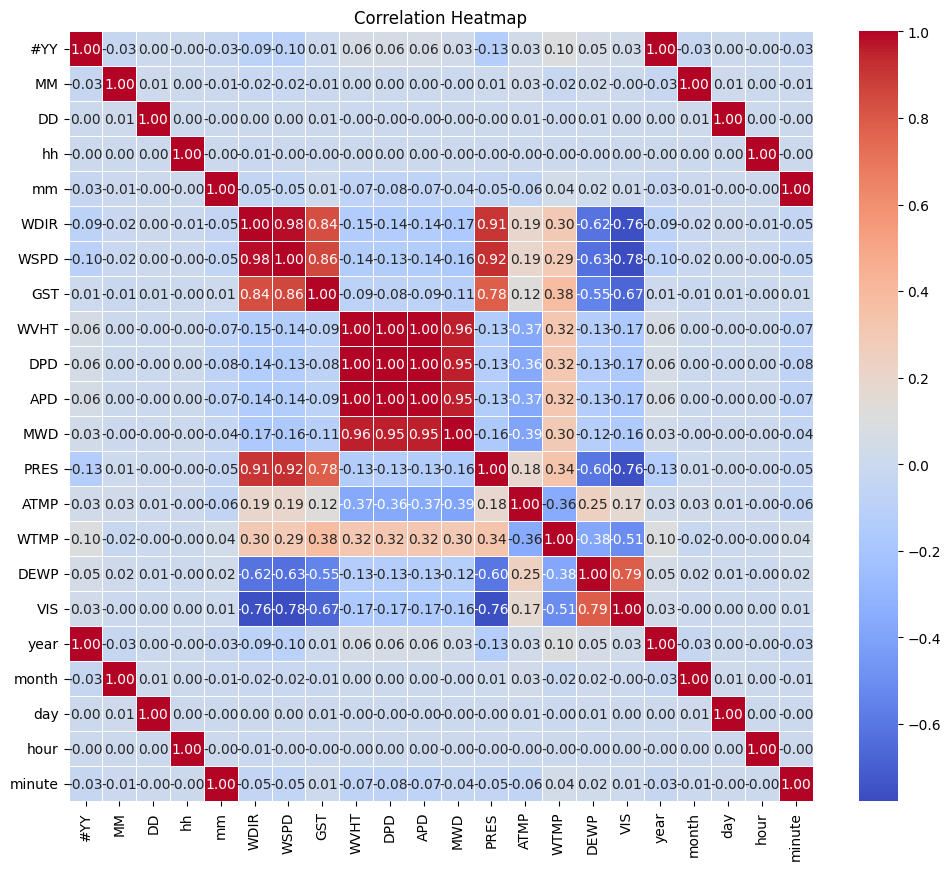

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display basic information about the dataset
print(all_feature_data.info())

# Display summary statistics
print(all_feature_data.describe())

# Check for missing values
print("Missing values in the dataset:")
print(all_feature_data.isnull().sum())

# Correlation matrix
correlation_matrix = all_feature_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Display summary statistics without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#print(all_feature_data.describe())


all_feature_data.describe()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,PRES,ATMP,WTMP,DEWP,VIS,year,month,day,hour,minute
count,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,...,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000
mean,2018.355,6.648,15.765,11.501,27.328,475.070,33.878,41.676,90.205,91.145,...,3967.924,161.586,531.342,745.204,78.330,2018.355,6.648,15.765,11.501,27.328
std,2.554,3.424,8.821,6.921,17.525,364.724,44.442,45.555,27.890,24.929,...,4219.027,351.819,491.962,431.718,38.867,2.554,3.424,8.821,6.921,17.525
min,2013.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.420,2.990,...,986.000,0.000,7.800,-14.300,0.000,2013.000,1.000,1.000,0.000,0.000
25%,2016.000,4.000,8.000,5.000,12.000,231.000,2.300,4.300,99.000,99.000,...,1014.700,12.100,13.700,16.400,99.000,2016.000,4.000,8.000,5.000,12.000
50%,2018.000,7.000,16.000,12.000,30.000,288.000,4.700,8.400,99.000,99.000,...,1019.500,14.100,999.000,999.000,99.000,2018.000,7.000,16.000,12.000,30.000
75%,2021.000,10.000,23.000,17.000,42.000,999.000,99.000,99.000,99.000,99.000,...,9999.000,17.200,999.000,999.000,99.000,2021.000,10.000,23.000,17.000,42.000
max,2022.000,12.000,31.000,23.000,59.000,999.000,99.000,99.000,99.000,99.000,...,9999.000,999.000,999.000,999.000,99.000,2022.000,12.000,31.000,23.000,59.000


In [ ]:
custom_percentiles = [0.3, 0.6, 0.8, 0.9]

# Display summary statistics with custom percentiles
custom_describe = all_feature_data.describe(percentiles=custom_percentiles)

custom_describe




,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,PRES,ATMP,WTMP,DEWP,VIS,year,month,day,hour,minute
count,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,...,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000,3111213.000
mean,2018.355,6.648,15.765,11.501,27.328,475.070,33.878,41.676,90.205,91.145,...,3967.924,161.586,531.342,745.204,78.330,2018.355,6.648,15.765,11.501,27.328
std,2.554,3.424,8.821,6.921,17.525,364.724,44.442,45.555,27.890,24.929,...,4219.027,351.819,491.962,431.718,38.867,2.554,3.424,8.821,6.921,17.525
min,2013.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.420,2.990,...,986.000,0.000,7.800,-14.300,0.000,2013.000,1.000,1.000,0.000,0.000
30%,2017.000,4.000,10.000,7.000,17.000,242.000,2.700,4.900,99.000,99.000,...,1015.500,12.500,14.300,999.000,99.000,2017.000,4.000,10.000,7.000,17.000
50%,2018.000,7.000,16.000,12.000,30.000,288.000,4.700,8.400,99.000,99.000,...,1019.500,14.100,999.000,999.000,99.000,2018.000,7.000,16.000,12.000,30.000
60%,2019.000,8.000,19.000,14.000,34.000,318.000,6.700,14.300,99.000,99.000,...,1023.000,15.100,999.000,999.000,99.000,2019.000,8.000,19.000,14.000,34.000
80%,2021.000,10.000,25.000,19.000,48.000,999.000,99.000,99.000,99.000,99.000,...,9999.000,18.800,999.000,999.000,99.000,2021.000,10.000,25.000,19.000,48.000
90%,2022.000,11.000,28.000,21.000,50.000,999.000,99.000,99.000,99.000,99.000,...,9999.000,999.000,999.000,999.000,99.000,2022.000,11.000,28.000,21.000,50.000
max,2022.000,12.000,31.000,23.000,59.000,999.000,99.000,99.000,99.000,99.000,...,9999.000,999.000,999.000,999.000,99.000,2022.000,12.000,31.000,23.000,59.000


from matplotlib import pyplot as plt
custom_describe['#YY'].plot(kind='hist', bins=20, title='#YY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
custom_describe['MM'].plot(kind='hist', bins=20, title='MM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
custom_describe['DD'].plot(kind='hist', bins=20, title='DD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
custom_describe['hh'].plot(kind='hist', bins=20, title='hh')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
custom_describe.plot(kind='scatter', x='#YY', y='MM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
custom_describe.plot(kind='scatter', x='MM', y='DD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
custom_describe.plot(kind='scatter', x='DD', y='hh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
custom_describe.plot(kind='scatter', x='hh', y='mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['#YY']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = custom_describe.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('#YY')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['MM']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = custom_describe.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('MM')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['DD']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = custom_describe.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('DD')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['hh']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = custom_describe.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('hh')

from matplotlib import pyplot as plt
custom_describe['#YY'].plot(kind='line', figsize=(8, 4), title='#YY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
custom_describe['MM'].plot(kind='line', figsize=(8, 4), title='MM')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
custom_describe['DD'].plot(kind='line', figsize=(8, 4), title='DD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
custom_describe['hh'].plot(kind='line', figsize=(8, 4), title='hh')
plt.gca().spines[['top', 'right']].set_visible(False)

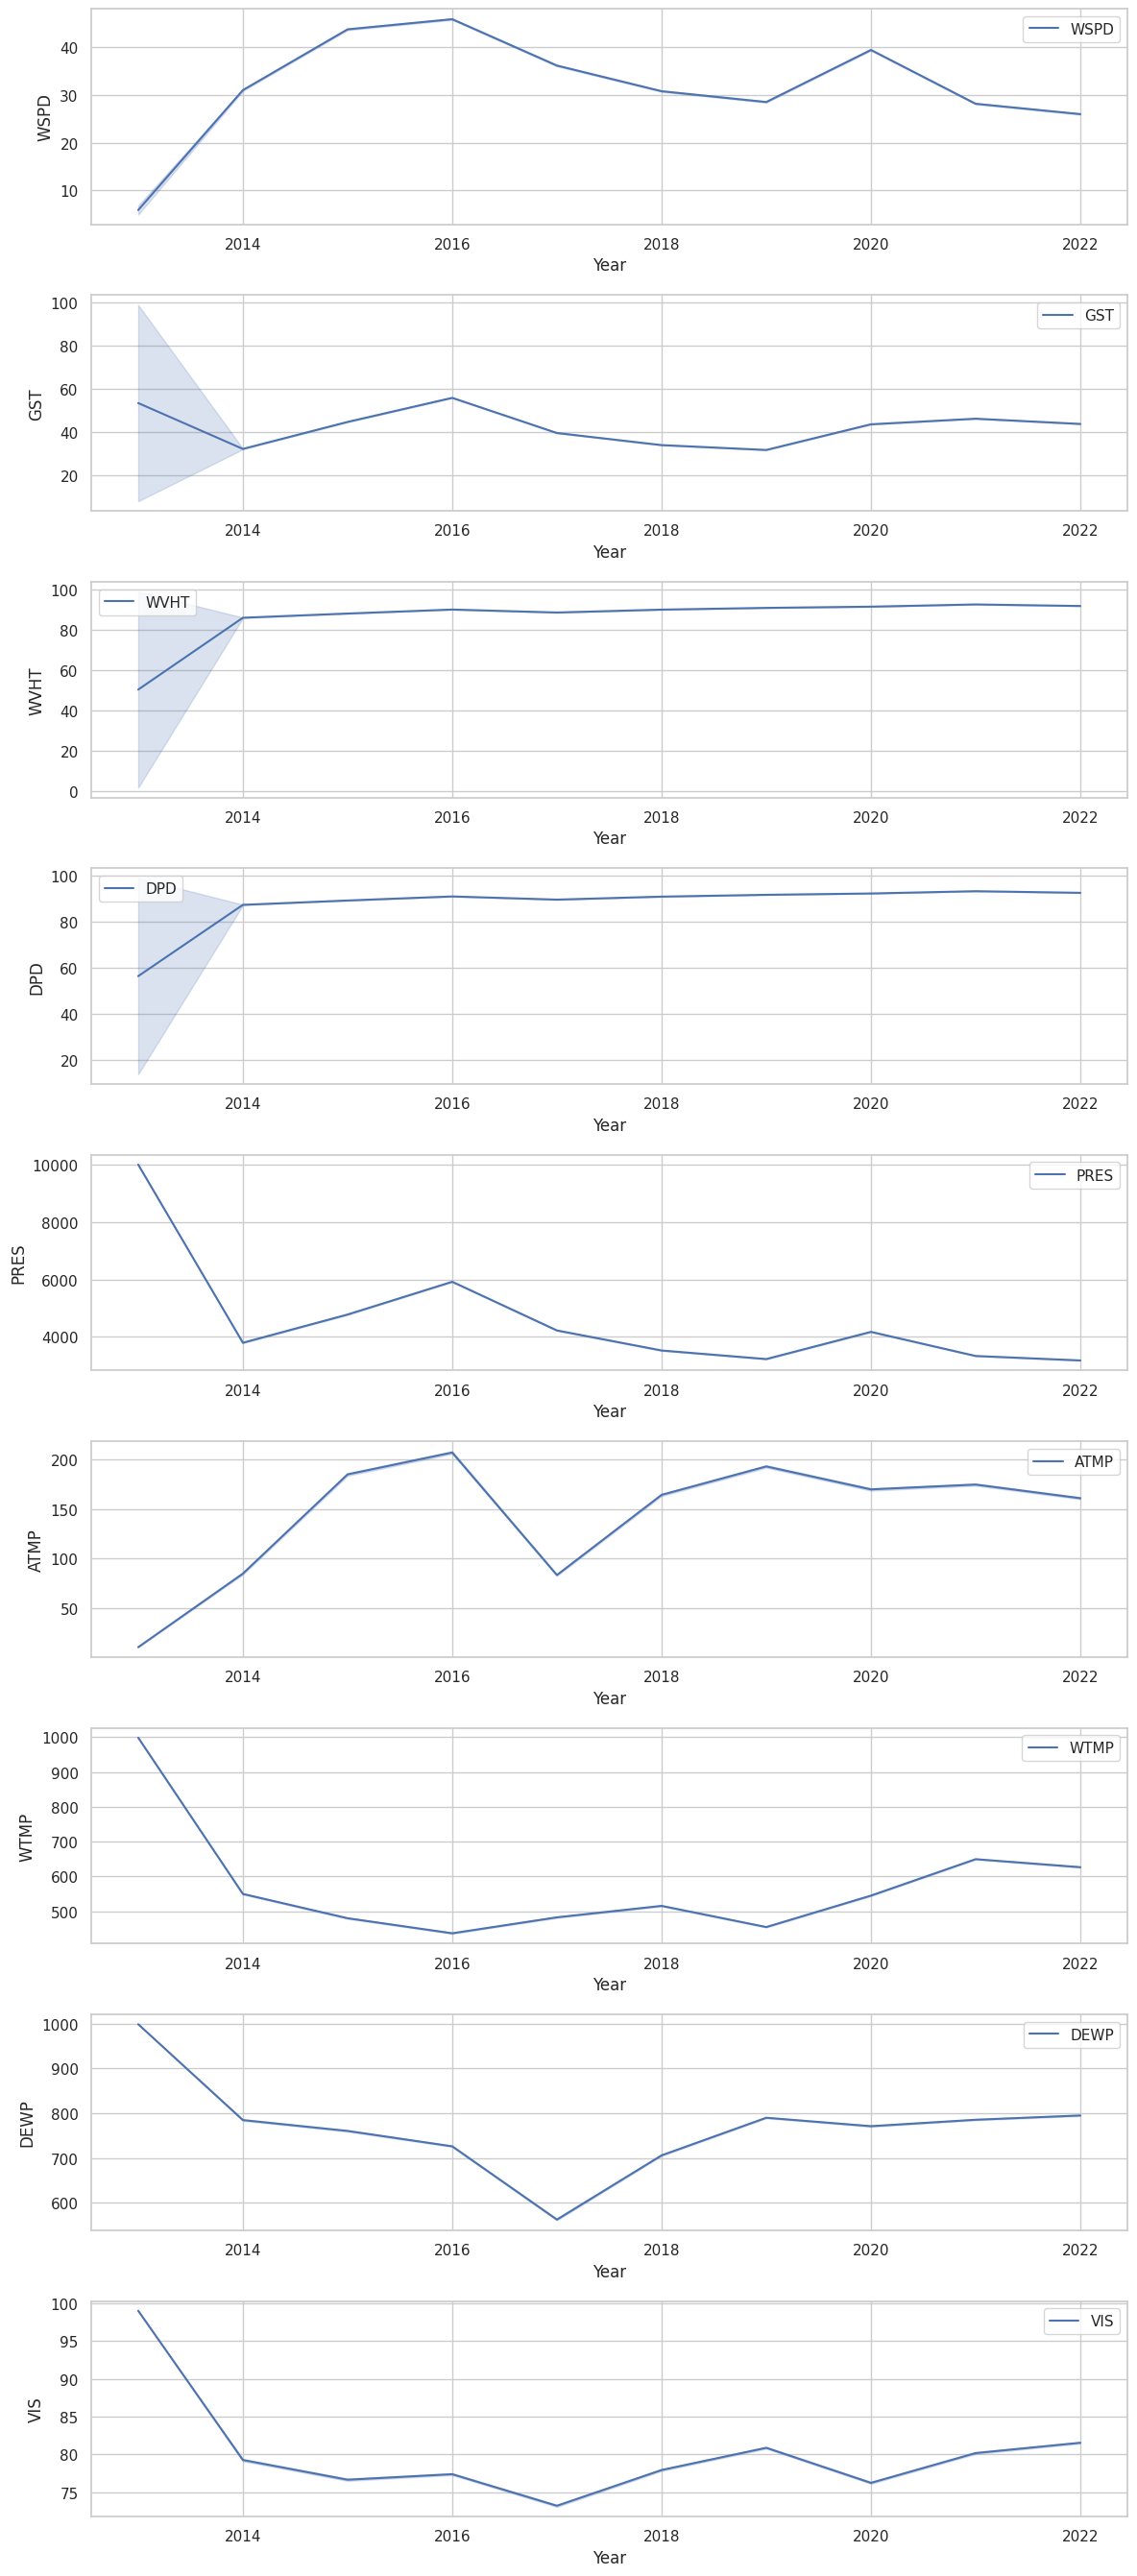

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features_to_plot = ['WSPD', 'GST', 'WVHT', 'DPD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS']

# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(12, 3 * len(features_to_plot)))

# Plot each feature
for i, feature in enumerate(features_to_plot):
    sns.lineplot(x='year', y=feature, data=all_feature_data, ax=axes[i], label=feature)

    # Add labels and title
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('Year')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


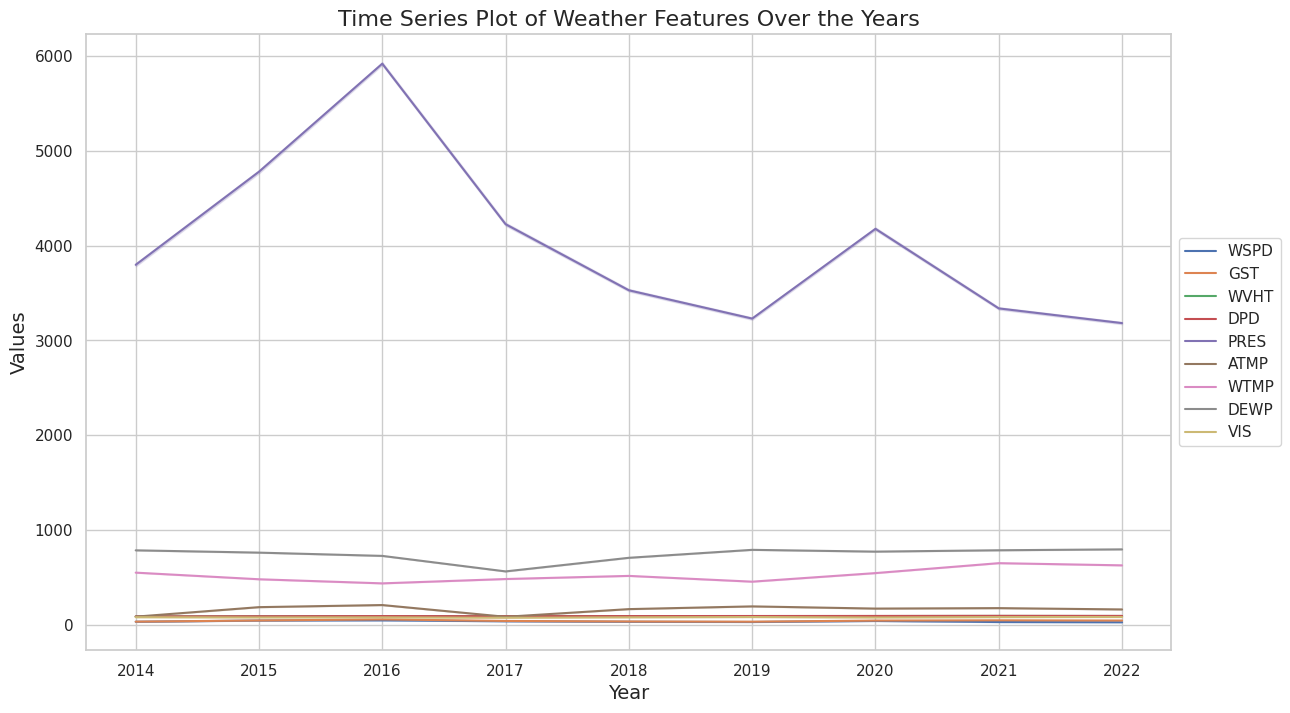

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for the year
all_feature_data['year'] = all_feature_data['timestamp'].dt.year

# Specify the order of the years
year_order = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Convert the 'year' column to a categorical data type with the specified order
all_feature_data['year'] = pd.Categorical(all_feature_data['year'], categories=year_order, ordered=True)

# Sort the dataframe by the year column
all_feature_data = all_feature_data.sort_values(by='year')

# List of features to plot
features_to_plot = ['WSPD', 'GST', 'WVHT', 'DPD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS']

# Create a line plot for each feature
plt.figure(figsize=(14, 8))
for feature in features_to_plot:
    sns.lineplot(x='year', y=feature, data=all_feature_data, label=feature)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Time Series Plot of Weather Features Over the Years', fontsize=16)
plt.show()


In [ ]:
PRE-PROCESING

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678318 entries, 0 to 1677867
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   WDIR        1678318 non-null  float64
 1   WSPD        1678318 non-null  float64
 2   GST         1678318 non-null  float64
 3   PRES        1678318 non-null  float64
 4   ATMP        1678318 non-null  float64
 5   EVENT_TYPE  1678318 non-null  object 
dtypes: float64(5), object(1)
memory usage: 89.6+ MB
None
               WDIR          WSPD           GST          PRES          ATMP
count  1.678318e+06  1.678318e+06  1.678318e+06  1.678318e+06  1.678318e+06
mean   2.291675e+02  3.555859e+00  5.388166e+00  1.316258e+03  1.345798e+01
std    8.308758e+01  2.554736e+00  3.267692e+00  1.613620e+03  2.918164e+00
min    0.000000e+00  0.000000e+00  0.000000e+00  9.860000e+02  0.000000e+00
25%    1.970000e+02  1.700000e+00  2.900000e+00  1.013300e+03  1.160000e+01
50%    2.480000e+02  3.000000e

<ipython-input-45-25cffedb0d82>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = all_data.corr()


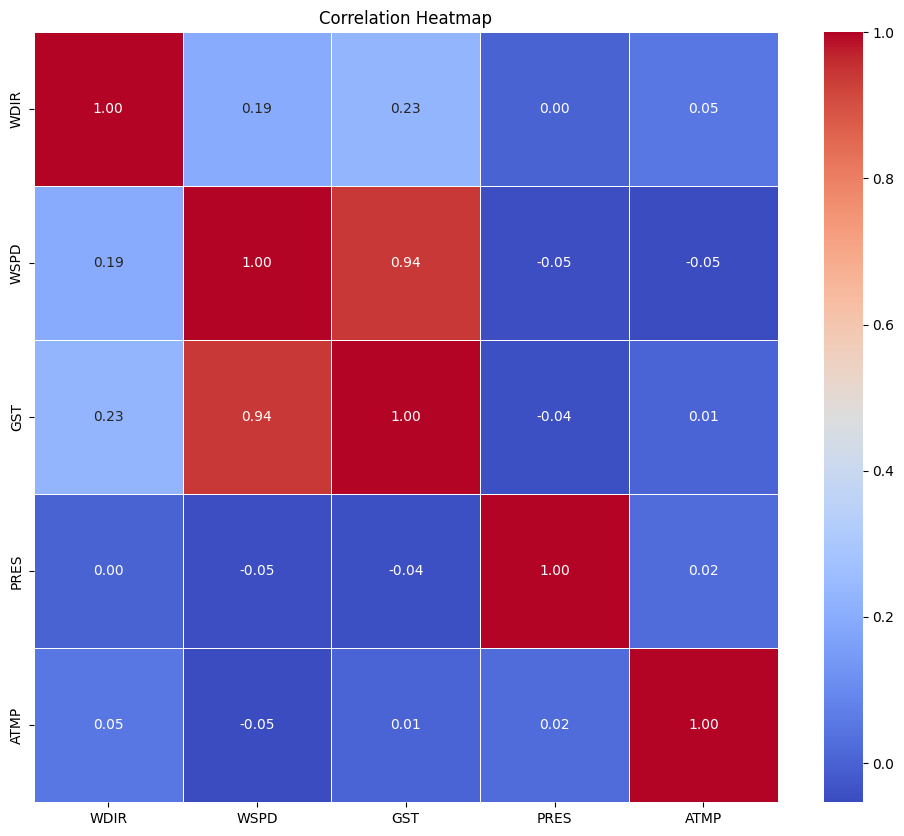

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display basic information about the dataset
print(all_data.info())

# Display summary statistics
print(all_data.describe())

# Check for missing values
print("Missing values in the dataset:")
print(all_data.isnull().sum())

# Correlation matrix
correlation_matrix = all_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
